# Кластеризация

Реализовать алгоритмы кластеризации:
* KMeans(random)
* MiniBatchKMeans

Прототип класса:

In [2]:
class KMean: # или MiniBatchKMeans
    def __init__(self, init):
        pass
        
    def fit(data):
        pass
    
    def predict(data):
        pass

Результат:
* 2 варианта реализации алгоритма KMeans
* Сравнение времени работы п

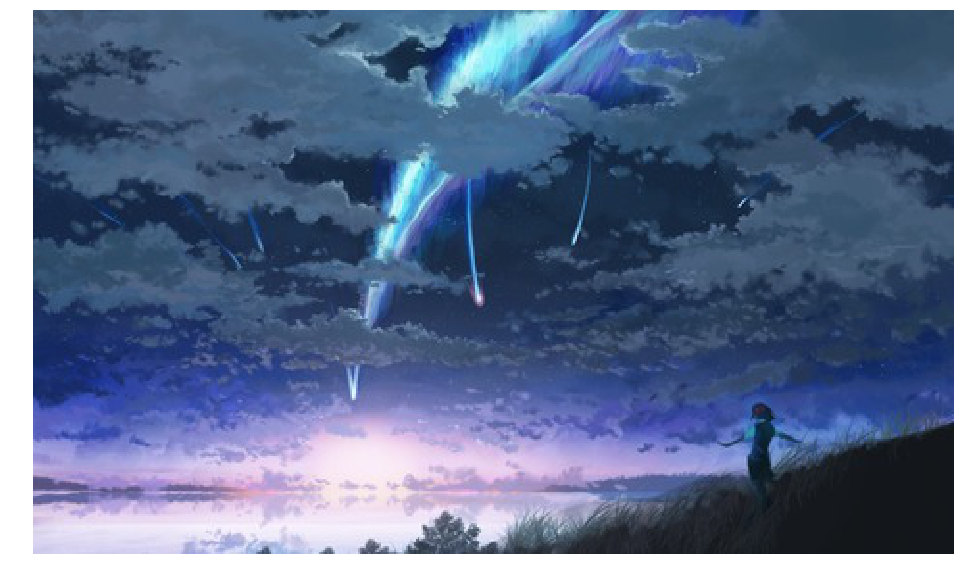

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
image = mpimg.imread('./resize_123.jpg')
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(image)
plt.show()
img_data = image.reshape((image.shape[0]*image.shape[1],3))

def p(A, B):
    if (len(A) == len(B)):
        return np.sqrt(np.sum(np.square(np.sum([A, -B], axis=0))))
    else:
        raise ValueError("Incorrect vectors: ", A, B)

class KMeans:
    
    def __init__(self, n_clusters=4, low=0, high=1):
        self.n_clusters = n_clusters
        self.cluster_centers = None
        self.low = low
        self.high = high
        
    def fit(self, data):
        self.cluster_centers = np.zeros((self.n_clusters, data.shape[1]))
        for i in range(0, self.n_clusters):
            for j in range(0, data.shape[1]):
                self.cluster_centers[i][j] = np.random.uniform(self.low, self.high, 1)
            
        u = np.array([0 for x in range(0, data.shape[0])])
        y = np.zeros((data.shape[0],))
        
        work = True
        EPS = 1
        
        count = 0
        
        while (work):
            
            work = False
            
            for i in range(0, data.shape[0]):
                pos_xi = np.zeros((self.n_clusters,))
                for j in range(0, self.n_clusters):
                    pos_xi[j] = p(data[i], self.cluster_centers[j])
                y_i = np.argmin(pos_xi)
                u[i] = y_i
                if (np.absolute(y[i] - pos_xi[y_i]) > EPS):
                    work = True
                y[i] = pos_xi[y_i]

            for k in range(0, self.n_clusters):
                for dim in range(0, data.shape[1]):
                    sd = 0
                    cn = 0
                    for i in range(0, data.shape[0]):
                        if (u[i] == k):
                            sd += data[i][dim]
                            cn += 1
                    if (cn != 0):
                        self.cluster_centers[k][dim] = sd / cn
                        
            count += 1
            
            if (count >= 30):
                work = False
                
        return self
    
    def predict(self, data):
        u = np.array([0 for x in range(0, data.shape[0])])
        for i in range(0, data.shape[0]):
            pos_xi = np.zeros((self.n_clusters,))
            for j in range(0, self.n_clusters):
                pos_xi[j] = p(data[i], self.cluster_centers[j])
            y_i = np.argmin(pos_xi)
            u[i] = y_i
        return u

In [44]:
%timeit km = KMeans(n_clusters = 8, low = 0, high = 250).fit(img_data)

1 loop, best of 3: 1min 44s per loop


In [41]:
proc_data = km.predict(img_data)
new_image = []
for cluster in proc_data:
    new_image.append(km.cluster_centers[cluster])
new_image = np.array(new_image).astype(np.uint8)

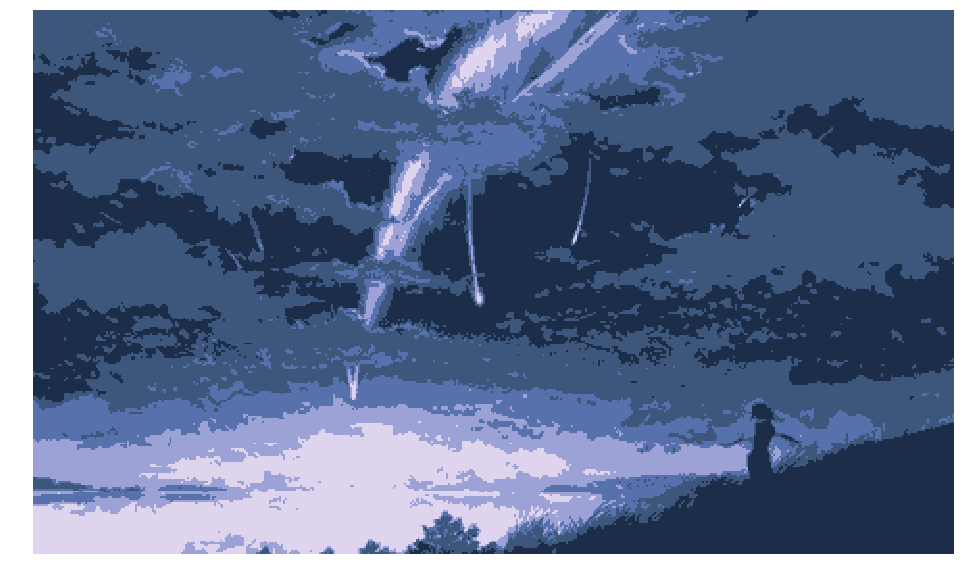

In [42]:
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()

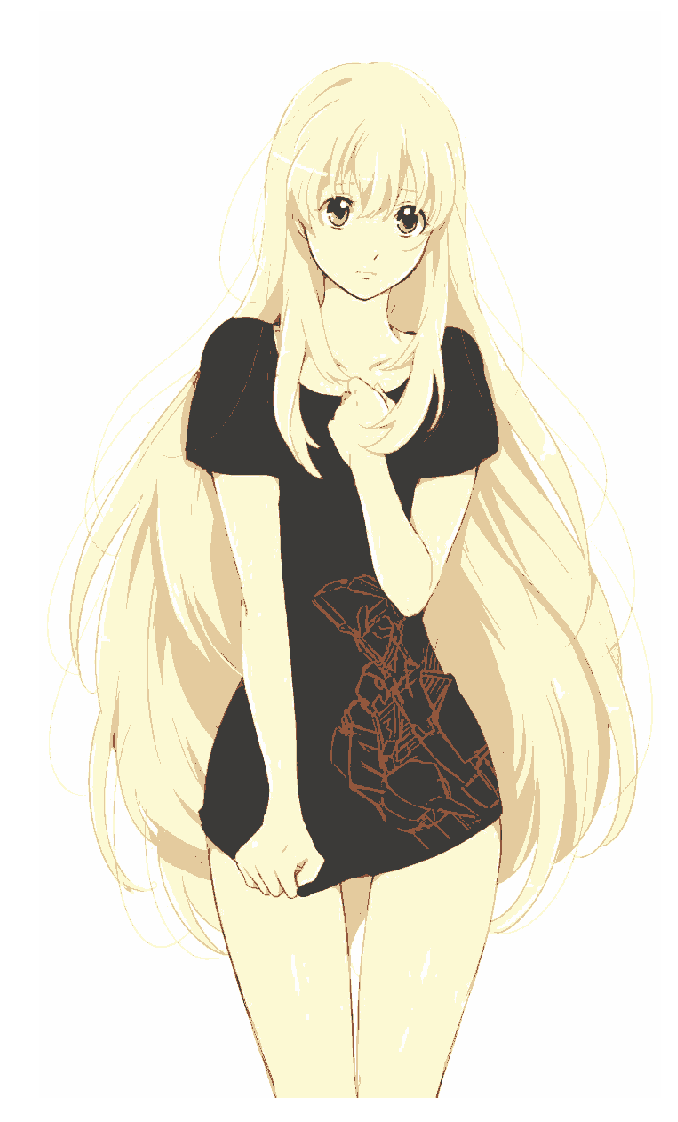

In [30]:
plt.figure(figsize=(30,20))
plt.axis("off")
plt.imshow(new_image)
plt.show()

In [65]:
class MiniBatchKMeans:
    
    def __init__(self, n_clusters=4, low=0, high=1, batch_size=100):
        self.n_clusters = n_clusters
        self.cluster_centers = None
        self.low = low
        self.high = high
        self.batch_size = batch_size
        
    def fit(self, data):
        self.cluster_centers = np.zeros((self.n_clusters, data.shape[1]))
        for i in range(0, self.n_clusters):
            for j in range(0, data.shape[1]):
                self.cluster_centers[i][j] = np.random.uniform(self.low, self.high, 1)
            
        u = np.array([0 for x in range(0, data.shape[0])])
        y = np.zeros((data.shape[0],))
        
        work = True
        EPS = 1
        
        count = 0
        
        while (work):
            
            work = False
            
            batch_ids = np.random.choice(range(data.shape[0]), self.batch_size, replace=False)
            batch = np.zeros((self.batch_size, data.shape[1]))
            for i in range(0, self.batch_size):
                batch[i] = data[batch_ids[i]]
            
            for i in range(0, batch.shape[0]):
                pos_xi = np.zeros((self.n_clusters,))
                for j in range(0, self.n_clusters):
                    pos_xi[j] = p(batch[i], self.cluster_centers[j])
                y_i = np.argmin(pos_xi)
                u[i] = y_i
                if (np.absolute(y[i] - pos_xi[y_i]) > EPS):
                    work = True
                y[i] = pos_xi[y_i]

            for k in range(0, self.n_clusters):
                for dim in range(0, batch.shape[1]):
                    sd = 0
                    cn = 0
                    for i in range(0, batch.shape[0]):
                        if (u[i] == k):
                            sd += batch[i][dim]
                            cn += 1
                    if (cn != 0):
                        self.cluster_centers[k][dim] = sd / cn
                        
            count += 1
            
            if (count >= 30):
                work = False
                
        return self
    
    def predict(self, data):
        u = np.array([0 for x in range(0, data.shape[0])])
        for i in range(0, data.shape[0]):
            pos_xi = np.zeros((self.n_clusters,))
            for j in range(0, self.n_clusters):
                pos_xi[j] = p(data[i], self.cluster_centers[j])
            y_i = np.argmin(pos_xi)
            u[i] = y_i
        return u

In [69]:
%timeit kmb = MiniBatchKMeans(n_clusters = 8, low = 0, high = 250, batch_size=500).fit(img_data)

1 loop, best of 3: 3.1 s per loop


In [67]:
proc_data = kmb.predict(img_data)
new_image = []
for cluster in proc_data:
    new_image.append(kmb.cluster_centers[cluster])
new_image = np.array(new_image).astype(np.uint8)

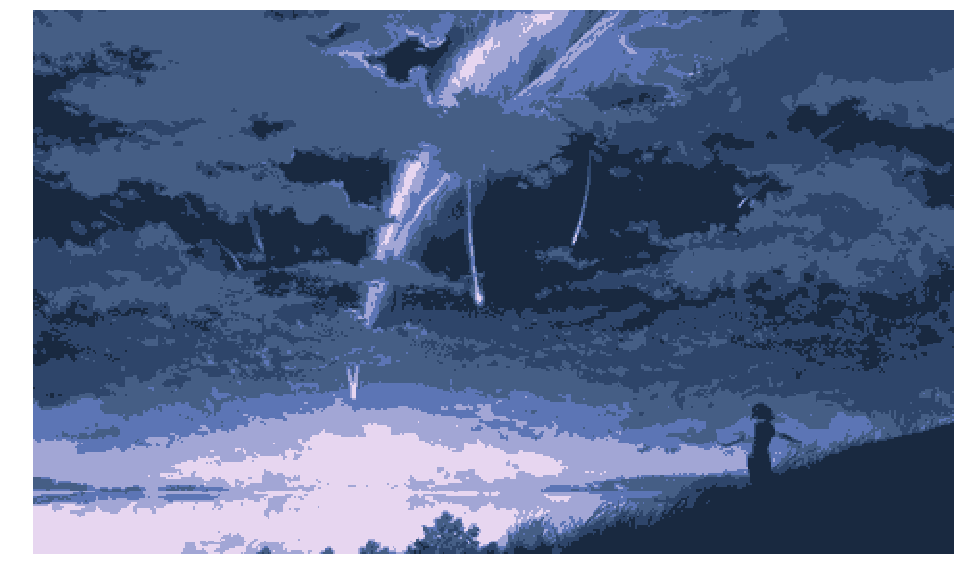

In [68]:
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()

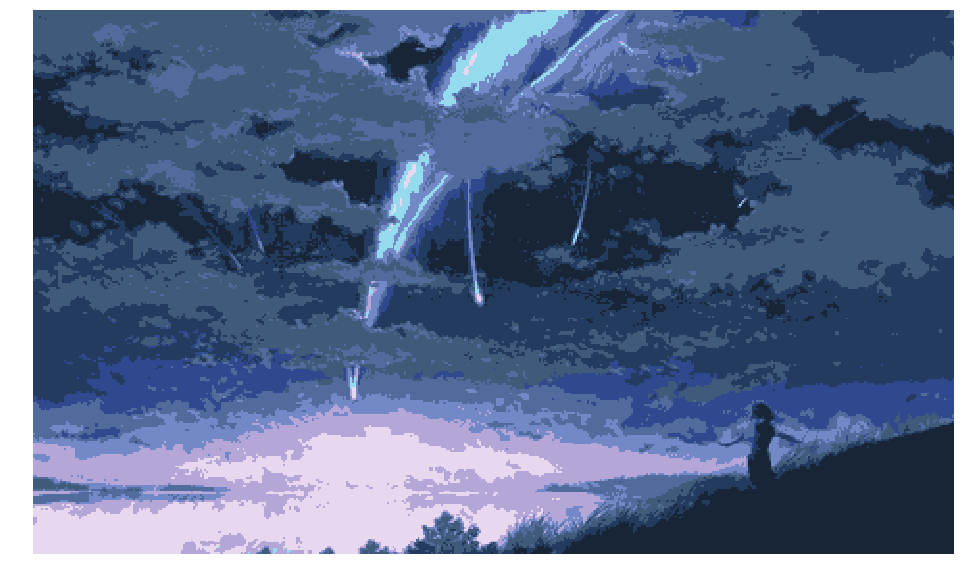

In [70]:
kmb = MiniBatchKMeans(n_clusters = 16, low = 0, high = 250, batch_size=500).fit(img_data)
proc_data = kmb.predict(img_data)
new_image = []
for cluster in proc_data:
    new_image.append(kmb.cluster_centers[cluster])
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()

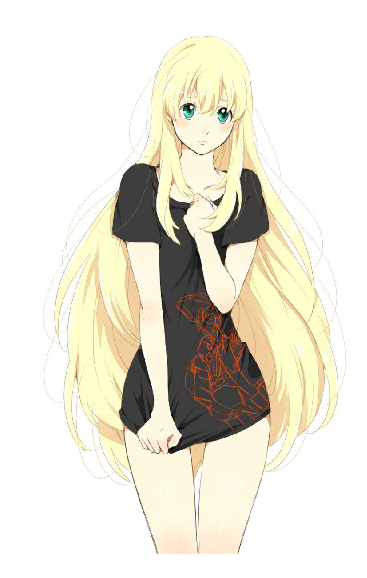

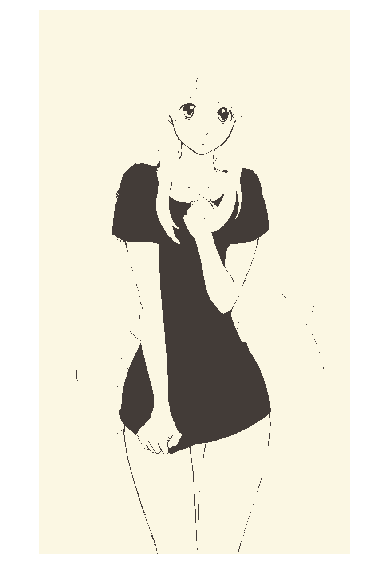

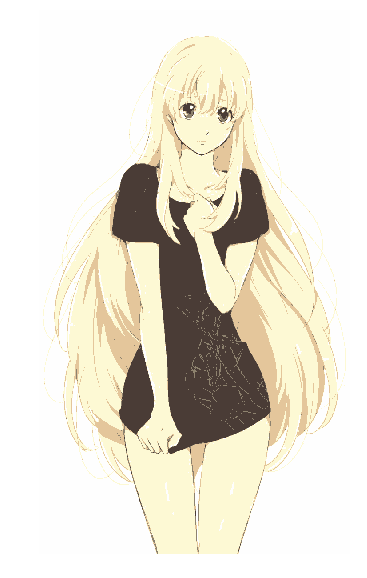

In [73]:
image = mpimg.imread('./asseylum.jpg')
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(image)
plt.show()
img_data = image.reshape((image.shape[0]*image.shape[1],3))
kmb = MiniBatchKMeans(n_clusters = 2, low = 0, high = 250, batch_size=500).fit(img_data)
proc_data = kmb.predict(img_data)
new_image = []
for cluster in proc_data:
    new_image.append(kmb.cluster_centers[cluster])
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()
kmb = MiniBatchKMeans(n_clusters = 5, low = 0, high = 250, batch_size=500).fit(img_data)
proc_data = kmb.predict(img_data)
new_image = []
for cluster in proc_data:
    new_image.append(kmb.cluster_centers[cluster])
new_image = np.array(new_image).astype(np.uint8)
new_image = new_image.reshape((image.shape[0],image.shape[1],3))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(new_image)
plt.show()